# 16.1 - Pascal-Julien Lajoie

Comme d'habitude, un peu de boilerplate (du code pas trop important)

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
from pandas import DataFrame

In [5]:
format = "%M:%S"
movements = ["Lunge Forward", "Burpees", "Lunge Back", "CTB"]
times = [datetime.datetime.strptime('20:00', format)]
exercices = []
rounds = []
for i, line in enumerate(open('Pascal_16_1.txt')):
    times.append(datetime.datetime.strptime(line.strip(), format))
    exercices.append(movements[i%4])
    rounds.append(i//4 + 1)

In [6]:
times = np.array(times)
deltas = (times - np.roll(times, -1))[:-1]
deltas = [d.total_seconds() for d in deltas]

In [7]:
df = DataFrame(deltas, columns=['Time'])
df['Movement'] = exercices
df['Round'] = rounds

Sauf pour la première et la 5 rondes, on peut voir une constance à travers les rondes.

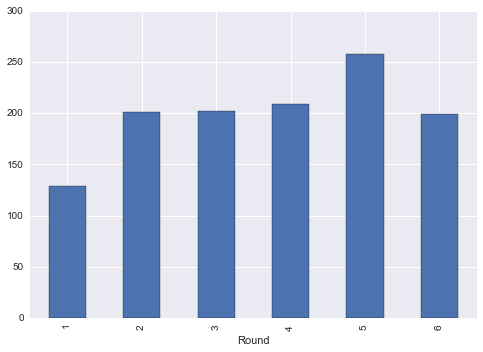

In [8]:
_ = df.groupby('Round')["Time"].sum().plot(kind='bar')

Un coup d'oeil rapide à certaine statistique de base par ronde:
- La ronde la plus courte: 129 secondes
- La ronde la plus longue: 258 secondes ou 4m18
- La moyenne de temps par ronde: 200 secondes ou 3m20

In [9]:
df.groupby('Round')["Time"].sum().describe()

count      6.000000
mean     199.666667
std       41.210031
min      129.000000
25%      199.500000
50%      201.500000
75%      207.250000
max      258.000000
Name: Time, dtype: float64

On peut voir ici le breakdown par exercices, soit le temps que chaque exercice a prit à chacune des rondes. Pascal a eu une constance à peu près partout sauf dans les burpees. Par exemple, à la première ronde les burpees ont prit un peu moins de 30 secondes alors qu'à la 5e c'était environ 95 secondes, soit plus de trois fois plus longtemps.

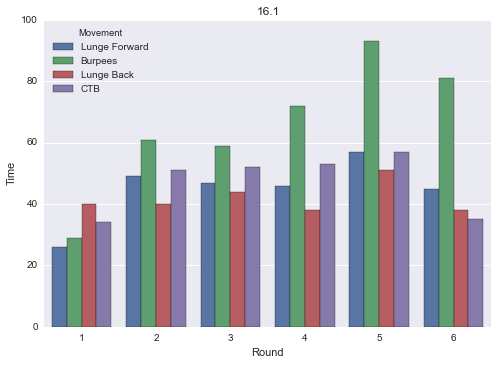

In [10]:
g = sns.barplot(x='Round', y='Time', hue='Movement', data=df)
_ = g.set_title("16.1")
_ = g.set_ylabel('Time')

Dans ce graphique la hauteur des barres de couleurs indiquent le temps moyen du mouvement et la longueur de la barre noire est la variation dans tous les temps (i.e. longue barre indique qu'il y avait beaucoup d'écart entre la ronde la plus rapide et la plus lente). 

Si nous regardons les performances par mouvement nous pouvons voir que ce sont les *Burpees* qui sont les plus **inconstants** alors que les *Lunges* pour le retour sont plus stables. 

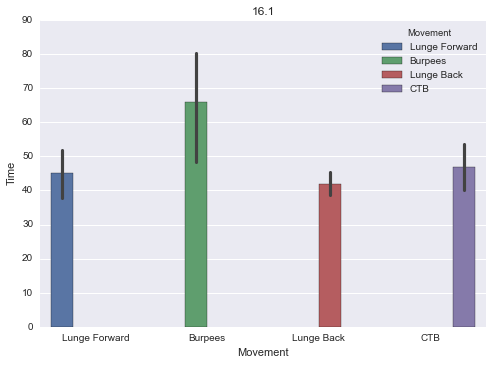

In [11]:
g = sns.barplot(x='Movement', y='Time', hue='Movement', data=df)
_ = g.set_title("16.1")
_ = g.set_ylabel('Time')

In [12]:
import numpy as np
import pylab as pl

class Radar(object):

    def __init__(self, fig, titles, labels, rect=None):
        if rect is None:
            rect = [0.1, 0.1, 0.9, 0.9]

        self.n = len(titles)
        self.angles = np.arange(0, 360, 360.0/self.n)
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) 
                         for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, fontsize=14)
        self.ax.set_theta_direction(-1)
#         self.ax.set_theta_offset(math.radians(90))
#         self.ax.set_thetagrids(self.angles, labels=titles, fontsize=14)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)

        for ax, angle in zip(self.axes, self.angles):
            ax.set_rgrids(labels, angle=angle, labels=labels)
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(0, max(labels))

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        self.ax.plot(angle[:len(values)], values, *args, **kw)

In [13]:
import math
def roundup(x):
    return int(math.ceil(x / 10.0)) * 10

Une autre façon de voir les données du breakdown par exercices. La première ronde commence à droite (ou l'équivalent de 3h sur une montre) et la distance à partir du centre représente le nombre de secondes.

L'inconstance des *Burpees* fait paraître le restant des mouvements beaucoup plus constant. C'est vraiment ce mouvement qui est révélateur de la condition de l'athlète au moment de faire le WOD.

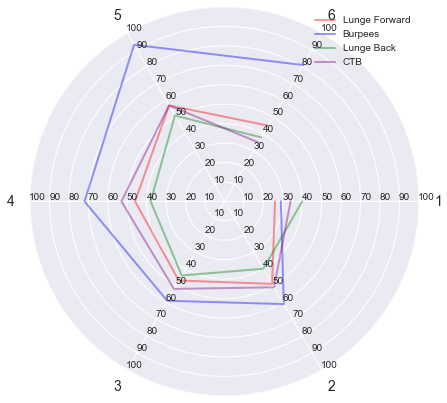

In [14]:
rounds = df.Round.unique()
labels = list(range(0, roundup(df.Time.max())+1, 10))[1:]
fig = pl.figure(figsize=(6, 6))
radar = Radar(fig, rounds, labels)
groups = df.groupby('Movement')
movements = ["Lunge Forward", "Burpees", "Lunge Back", "CTB"]
colors = ['r', 'b', 'g', 'purple']
for i, movement in enumerate(movements):
    times = df[df['Movement'] == movement]['Time'].astype(int).values
#     print(times)
    radar.plot(times,  "-", lw=2, color=colors[i], alpha=0.4, label=movement)

_ = radar.ax.legend()

## Conclusion

Il n'y a ici que constation des faits et pas de conclusions sur la meilleure façon de procéder. Il est raisonnable de penser qu'il est préférable de garder une cadence constante mais à défaut d'avoir plus de données sur un plus grand nombre d'athlète on ne peut pas conclure que la constance est l'objectif premier.

Mais bon, on s'entend pour dire que l'expérience a tendance à nous dire qu'un WOD ne se gagne pas dans la première minute mais il se perd dans la première minute. N'y allez pas en fou en partant.